In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [13]:
SHOW_PLOT = True
SAVE_PLOT = True

In [14]:
def plot_histogram():
    N_BINS = 250

    filepath = os.path.join(os.pardir, os.pardir, 'results', 'mutual_inclinations', 'mean_median_variations.csv')
    data = pd.read_csv(filepath)

    # Creates mask to find aligned Omega systems and random Omega systems using boolean indexing.
    random_systems_mask = np.array(['_randomO' in system_name for system_name in data['System']])
    aligned_systems_mask = ~random_systems_mask # Inverts the boolean mask (turns every True->False and every False->True).

    random_variation_data = (data[random_systems_mask]['Variation'].astype(float))
    aligned_variation_data = (data[aligned_systems_mask]['Variation'].astype(float))
    random_frac_variation_data = (data[random_systems_mask]['Fractional Variation'].astype(float))
    aligned_frac_variation_data = (data[aligned_systems_mask]['Fractional Variation'].astype(float))

    (fig, axes) = plt.subplots(1, 2)
    fig.set_size_inches(18, 9)

    title = 'Distribution of Mutual Inclination Mean-Median Variations'

    colors = [
        ['red', 'blue'],
        ['red', 'blue']
    ]
    
    labels = [
        ['Aligned', 'Random'],
        ['', '']
    ]

    xlabels = ['Variation$^\circ$ $(mean - median)$', 'Fractional Variation $(mean - median)/median$']

    series = [
        [aligned_variation_data, random_variation_data],
        [aligned_frac_variation_data, random_frac_variation_data]
    ]

    for column in range(len(axes)):
        plt.subplot(1, 2, column + 1)

        xlabel = xlabels[column]

        axis = axes[column]

        if column == 1:
            axis.set_xlim(-0.336, 0.18)

        for data_idx in range(len(series[column])):
            data = series[column][data_idx]
            color = colors[column][data_idx]
            label = labels[column][data_idx]

            axis.hist(data, bins = N_BINS, color = color, label = label, alpha = 0.5)

        axis.minorticks_on()

        axis.grid(True, axis = 'x', alpha = 0.25)
        
        axis.xaxis.set_major_locator(tck.LinearLocator(14))
        axis.xaxis.set_major_formatter(tck.FuncFormatter(lambda x,pos: '%.3f' % x))

        axis.set_xlabel(xlabel, fontsize = 15)
        axis.set_ylabel('Frequency', fontsize = 15)

        (ymin, ymax) = axis.get_ylim()
        (xmin, xmax) = axis.get_xlim()

        xscale = xmax - xmin

        axis.set_ylim(ymin, ymax)

        axis.vlines(0.0, ymin, ymax, color = 'black', alpha = 0.5, linestyles = 'dashed')
        plt.text(xscale * 0.01, ymax * 0.94, 'Zero Line', color = 'black')

    fig.legend(bbox_to_anchor = (0.9, 0.88), fontsize = 15)
    
    plt.subplots_adjust(wspace = 0.15)
    plt.suptitle(title, fontsize = 30, y = 0.95)

    if SHOW_PLOT:
        plt.show()

    if SAVE_PLOT:
        savepath = os.path.join(os.pardir, os.pardir, 'results', 'mutual_inclinations', 'mean_median_variations_histogram')
        fig.savefig(savepath, bbox_inches = 'tight', dpi = 300)

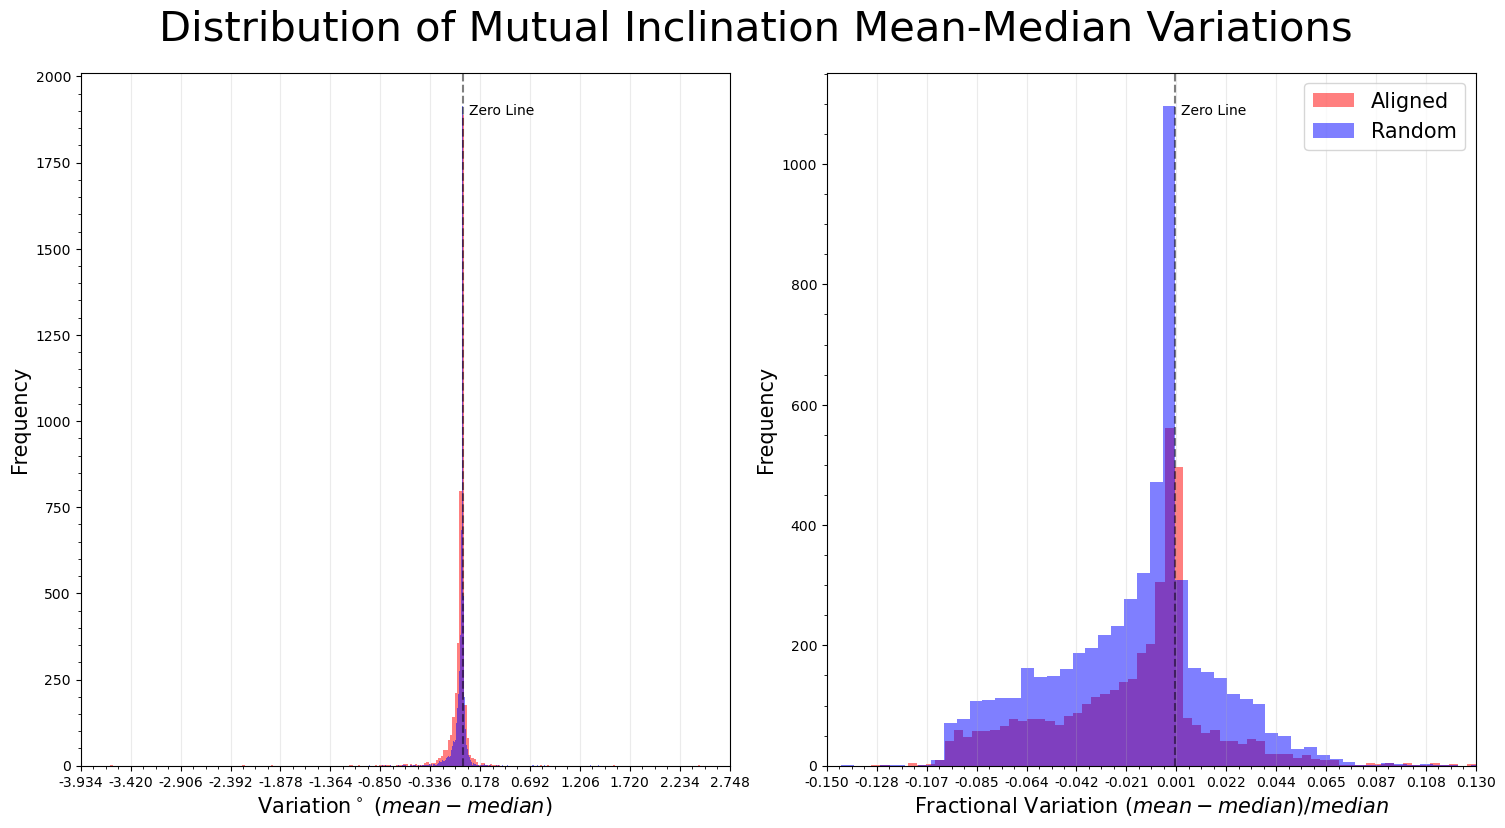

In [15]:
plot_histogram()